# Finding Heavy Traffic Indicators on I-94

The goal of this project is to determine a few indicators of heavy traffic on I-94. Heavy traffic is defined as the highest volumes of vehicles per hour traveling on the road. The speed of the vehicles and the interstate congestion are not available to us from this dataset and are therefore not a consideration of this analysis.

This [dataset](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) is from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) contains information described as:
> Hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN.

It also includes:
> Hourly weather features and holidays included for impacts on traffic volume.

This means that our analysis will be restricted to westbound traffic in this general area and will not necessarily give us useful information about the entire I-94 between Minneapolis and St. Paul. In this study, we will restrict our analysis to the impacts of weather and time on the amount of vehicles traveling past this traffic station.

## Import Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The [dataset documentation](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) lists the descriptions of the columns as the following:

* `holiday` - Categorical US National holidays plus regional holiday, Minnesota State Fair
* `temp` - Numeric Average temp in kelvin
* `rain_1h` - Numeric Amount in mm of rain that occurred in the hour
* `snow_1h` - Numeric Amount in mm of snow that occurred in the hour
* `clouds_all` - Numeric Percentage of cloud cover
* `weather_main` - Categorical Short textual description of the current weather
* `weather_description` - Categorical Longer textual description of the current weather
* `date_time` - DateTime Hour of the data collected in local CST time
* `traffic_volume` - Numeric Hourly I-94 ATR 301 reported westbound traffic volume

## Data Analysis

We will begin by analyzing the overall traffic volume to see what kinds of conclusions can be drawn and the best way to proceed with further analysis.

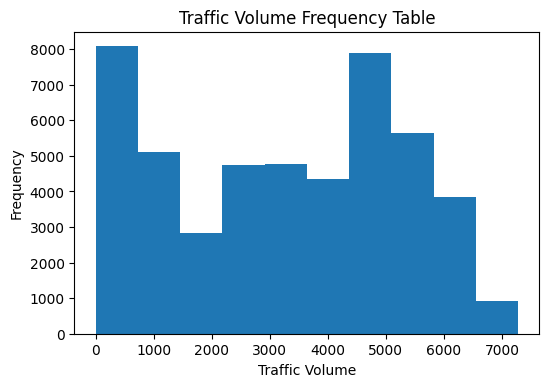

In [4]:
traffic['traffic_volume'].plot.hist()
plt.title('Traffic Volume Frequency Table')
plt.xlabel('Traffic Volume')
plt.show()

In [5]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

There are high frequencies of:
* Very little traffic - low traffic volumes likely occur at night
* Approximately 5,000 vehicles per hour

The histogram could possibly be a combination of a right-skewed distribution at night and a normal distribution during the day. Let's further examine this possibility and the differences in traffic volume during the day versus at night.

We'll split the dataset into two parts:
* Daytime data: hours from 5 a.m. to 9 p.m. (16 hours)
* Nighttime data: hours from 9 p.m. to 5 a.m. (8 hours)

This is not necessarily a perfect criterion for separating night and day, but it is a decent starting point. While this is not a 50/50 split of data, it is a reasonable split between typical peak and off-peak travel times and more likely to give us a better distribution for traffic.

In [6]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
day = traffic[traffic['date_time'].dt.hour.between(5, 21)]
night = traffic[~traffic['date_time'].dt.hour.between(5, 21)]

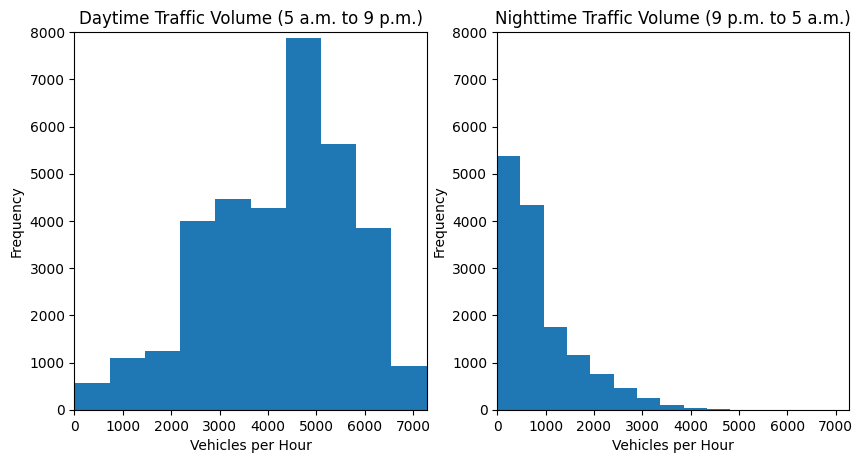

In [7]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
day['traffic_volume'].plot.hist()
plt.xlim([0, day['traffic_volume'].max()])
plt.ylim([0, 8000])
plt.title('Daytime Traffic Volume (5 a.m. to 9 p.m.)')
plt.xlabel('Vehicles per Hour')

plt.subplot(1, 2, 2)
night['traffic_volume'].plot.hist()
plt.xlim([0,day['traffic_volume'].max()])
plt.ylim([0, 8000])
plt.title('Nighttime Traffic Volume (9 p.m. to 5 a.m.)')
plt.xlabel('Vehicles per Hour')
plt.show()

In [8]:
day['traffic_volume'].describe()

count    33949.000000
mean      4241.373796
std       1455.995040
min          0.000000
25%       3124.000000
50%       4498.000000
75%       5320.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [9]:
night['traffic_volume'].describe()

count    14255.000000
mean       922.194669
std        735.716000
min          0.000000
25%        373.000000
50%        676.000000
75%       1183.000000
max       4816.000000
Name: traffic_volume, dtype: float64

Analyzing the histograms, we see that, as we expected, the nighttime traffic volume is right skewed. While the maximum traffic volume during that period is close to 5,000, the overall traffic volume is very low.

The daytime traffic volume, on the other hand, is actually left skewed, not normally distributed, with a mean volume of over 4,200, nearly as much as the maximum nighttime volume. Since we are looking for indicators of heavy traffic, we'll restrict our analysis to the daytime data.

### Traffic Volume by Timeframe

There are several factors which could be an indicator of heavy traffic. One of the most obvious is time. We'll look at a few line plots to show how the traffic volume changed according to the following timeframes:
* Month
* Day of the week
* Time of day

_Note: In a few of the following pieces of code we will find a "SettingWithCopyWarning" which is automatically generated. This is because we are adding columns to `day`, a slice of the original `traffic` dataset. [There are ways to deal with this warning](https://towardsdatascience.com/how-to-suppress-settingwithcopywarning-in-pandas-c0c759bd0f10), but, in this case, we will just ignore them as this code was written by [Dataquest](https://www.dataquest.io/) and given for the preparation of this project._

In [10]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

<ipython-input-10-b104fbd4ed31>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1     3993.398359
2     4179.364520
3     4301.622656
4     4326.994633
5     4373.582432
6     4392.270361
7     4134.925325
8     4414.037265
9     4329.681581
10    4391.007296
11    4174.165627
12    3910.925557
Name: traffic_volume, dtype: float64

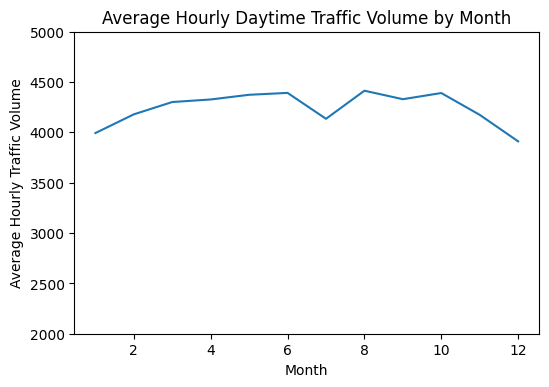

In [11]:
by_month['traffic_volume'].plot()
plt.title('Average Hourly Daytime Traffic Volume by Month')
plt.ylim([2000,5000])
plt.xlabel('Month')
plt.ylabel('Average Hourly Traffic Volume')
plt.show()

The traffic volume varies minimally by months with slightly lower volumes in July as well as in the winter months. The slight decrease in July could be because fewer people are traveling to work because they are on vacation. The lower traffic in the winter months could be because poor weather is causing some travellers to stay at home. We will look at weather factors later in our analysis.

In [12]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

<ipython-input-12-e4e897828b56>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dayofweek
0    4357.460558
1    4653.236440
2    4750.921215
3    4783.304475
4    4757.097525
5    3424.756386
6    2966.376211
Name: traffic_volume, dtype: float64

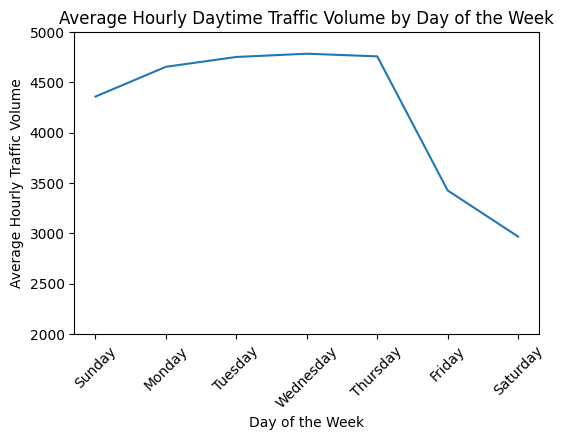

In [13]:
day_numbers = [0, 1, 2, 3, 4, 5, 6]
day_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

by_dayofweek['traffic_volume'].plot()
plt.title('Average Hourly Daytime Traffic Volume by Day of the Week')
plt.ylim([2000,5000])
plt.xlabel('Day of the Week')
plt.ylabel('Average Hourly Traffic Volume')
plt.xticks(ticks=day_numbers, labels=day_names, rotation=45)

plt.show()

There is an obvious dropoff in traffic volume on Saturdays and Sundays. This is likely because much of the traffic on westbound I-94 is people travelling to and from work.

In [14]:
day['hour'] = day['date_time'].dt.hour
weekday = day.copy()[day['dayofweek'] <= 4] #4 is Friday
weekend = day.copy()[day['dayofweek'] >= 5] #5 is Saturday
by_hour_weekday = weekday.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

by_hour_weekday['traffic_volume']

<ipython-input-14-90d5b2be9adb>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



hour
5     2701.296703
6     5365.983210
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
19    3298.340426
20    2842.433004
21    2673.042807
Name: traffic_volume, dtype: float64

In [15]:
by_hour_weekend['traffic_volume']

hour
5      639.237232
6     1089.100334
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
19    3220.234120
20    2815.039216
21    2658.445242
Name: traffic_volume, dtype: float64

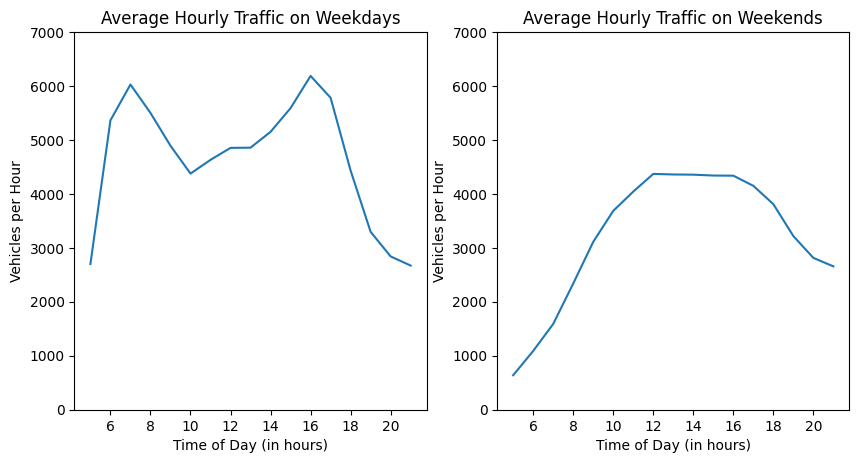

In [16]:
hours = [6, 8, 10, 12, 14, 16, 18, 20]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
by_hour_weekday['traffic_volume'].plot()
plt.title('Average Hourly Traffic on Weekdays')
plt.ylim([0, 7000])
plt.xlabel('Time of Day (in hours)')
plt.ylabel('Vehicles per Hour')
plt.xticks(hours)

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot()
plt.title('Average Hourly Traffic on Weekends')
plt.ylim([0, 7000])
plt.xlabel('Time of Day (in hours)')
plt.ylabel('Vehicles per Hour')
plt.xticks(hours)

plt.show()

On weekdays, traffic is heaviest in the morning and in the evening with a decrease between 10 a.m. and 3 p.m. On weekends, traffic is heavy from about noon to 6 p.m. with more traffic in the later part of the evening than in the morning.



### Traffic Volume by Timeframe - Summary

* Month - Traffic is fairly uniform with only slight dips in July and the winter months. 
* Day of the Week - Traffic is much heavier Monday through Friday than on the weekends.
* Time of Day - Weekday traffic is heavier in the morning and in the evening, peaking at 7 a.m, and at 4 p.m. while weekend traffic is heaviest between the hours of noon and 4 p.m.

### Traffic Volume by Weather

The dataset includes two different descriptions of weather:

* `weather_main` - A short textual description of the current weather
* `weather_description` - A Longer textual description of the current weather

We will analyze traffic volume by both of these columns to see if there are any conclusions which can be drawn.

In [17]:
day.corr()['traffic_volume']

temp              0.121737
rain_1h           0.004092
snow_1h           0.002727
clouds_all        0.001551
traffic_volume    1.000000
month            -0.007474
dayofweek        -0.323468
hour             -0.037428
Name: traffic_volume, dtype: float64

There isn't much correlation between `traffic volume` and any of the weather indicators, but let's look at a scatter plot for the strongest correlation with `traffic volume`, `temp`.

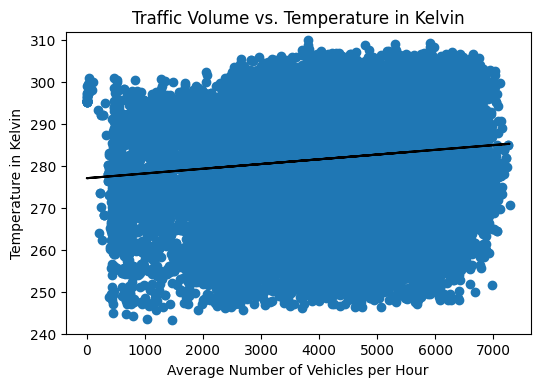

In [18]:
a, b = np.polyfit(day['traffic_volume'], day['temp'], 1)

plt.scatter(day['traffic_volume'], day['temp'])
plt.ylim([240,312]) # There are a few datapoints with 0 K
plt.title('Traffic Volume vs. Temperature in Kelvin')
plt.xlabel('Average Number of Vehicles per Hour')
plt.ylabel('Temperature in Kelvin')

plt.plot(day['traffic_volume'], a*day['traffic_volume']+b, color='black')

plt.show()

We have included a line of best fit to further emphasize that there is very little correlation between weather and traffic volume. There is no weather data which seems like a reliable indicator for heavy traffic. Nevertheless, let's continue our analysis to see if there are any conclusions to be drawn.

In [19]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

In [20]:
by_weather_main.index

Index(['Clear', 'Clouds', 'Drizzle', 'Fog', 'Haze', 'Mist', 'Rain', 'Smoke',
       'Snow', 'Squall', 'Thunderstorm'],
      dtype='object', name='weather_main')

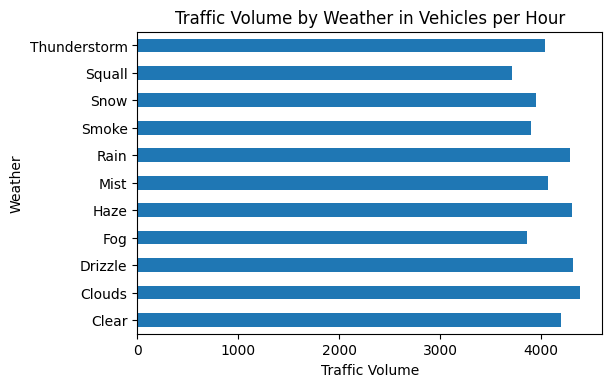

In [21]:
by_weather_main['traffic_volume'].plot.barh()
plt.title('Traffic Volume by Weather in Vehicles per Hour')
plt.xlabel('Traffic Volume')
plt.ylabel('Weather')
plt.show()

The highest traffic volume are when the weather is classed as rain, haze, drizzle, clouds, and clear. These are some of the more mild weather conditions, but the differences in traffic volume are minor. There is no clear indication that heavy traffic is caused any certain type of weather. We will continue our analysis by looking at the more detailed weather descriptions.

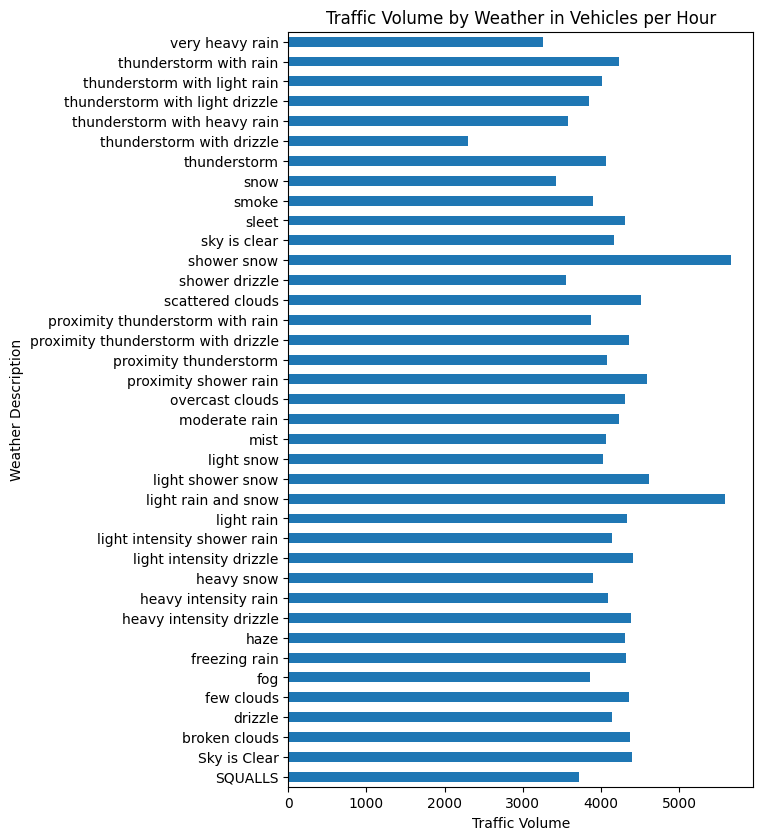

In [22]:
plt.figure(figsize=(6, 10))
by_weather_description['traffic_volume'].plot.barh()
plt.title('Traffic Volume by Weather in Vehicles per Hour')
plt.xlabel('Traffic Volume')
plt.ylabel('Weather Description')
plt.show()

There is quite heavy traffic during weather described as snow showers and light rain and snow showers and quite light traffic during weather described as a thunderstorm with drizzle. Before we can look further to see if this information is useful to us, we need to look at the frequency of each of these events to see if this data is statistically significant.

In [23]:
day['weather_description'].value_counts()

sky is clear                           7406
mist                                   3890
broken clouds                          3691
overcast clouds                        3674
scattered clouds                       2823
light rain                             2398
few clouds                             1557
light snow                             1347
Sky is Clear                           1234
moderate rain                          1150
haze                                   1040
light intensity drizzle                 783
fog                                     575
proximity thunderstorm                  468
drizzle                                 442
heavy snow                              442
heavy intensity rain                    335
snow                                    210
proximity shower rain                   135
thunderstorm                             78
heavy intensity drizzle                  45
thunderstorm with heavy rain             41
proximity thunderstorm with rain

In [24]:
a = day['weather_description'].value_counts()['light rain and snow'] / day['weather_description'].value_counts().sum()
b = day['weather_description'].value_counts()['thunderstorm with drizzle'] / day['weather_description'].value_counts().sum()
c = day['weather_description'].value_counts()['shower snow'] / day['weather_description'].value_counts().sum()

a = round(a * 100, 4)
b = round(b * 100, 4)
c = round(c * 100, 4)

print ('Light rain and snow: ' + str(a) + '%')
print ('Thunderstorm with drizzle: ' + str(b) + '%')
print ('Shower snow: ' + str(c) + '%')

Light rain and snow: 0.0118%
Thunderstorm with drizzle: 0.0059%
Shower snow: 0.0029%


These three weather conditions are all very infrequent with only seven total occurrences of these three weather descriptions in the entire dataset. This means that this data is an incredibly small sample size and does not give us any useful information about the amount of traffic that could be expected during these types of weather.

## Conclusions

From the data we have analyzed, the only indicator of heavy traffic in number of vehicles per hour is time.

* The month of the year has only a very slight impact on the volume of traffic with slightly lower volumes during the winter months. This could be because the weather discourages people from traveling or encourages them to use other means of transportation.
* The day of the week has a marked impact on the traffic volume with much heavier volumes on weekdays than on the weekend. This suggests that this stretch of road is commonly traveled to go to and from work.
* The hour of the day also has a significant impact on the traffic volume with much higher volumes of traffic during the day and very little traffic at night. The peak hours are 7 a.m. and 4 p.m. further indicating that a large portion of travelers are commuting to and from work.

In spite of the data showing that there is a very slight decrease in traffic volume during the winter months, there are no weather indicators for heavy traffic. Temperature had a very small correlation with traffic volume and general weather description showed no volume trends. There were a few longer-description weather conditions which showed a substantial increase or decrease in traffic volume, but these conditions were such a small sample size of the entire dataset that they cannot be considered reliable indicators.